# <div style="text-align: center"><span style="font-size:40px; text-decoration:underline;">Heatlh Connector Report Analysis</span></div>

## <div style="text-align: center"><span style="font-size:25px; text-decoration:underline;">Introduction</span></div>

The following is an analysis on a series of data files provided by DiscoverASG, a consulting and marketing company. The files reflect population and advertising data in the state of Massachusetts. We were tasked with assessing the effectiveness of advertising efforts made in certain cities.


## Data Compilation

In [1]:
import sys
import xlrd

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.svm as svm
import sklearn.model_selection as cross_validation # Code for cross validation.
import sklearn.cluster as cluster
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import tree

import sklearn.datasets as sk_data

#import matplotlib as mpl
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
wb2015 = xlrd.open_workbook("./data/MHIS-2015-Detailed-Tables.xlsx")
sheets2015 = wb2015.sheet_names()

In [5]:
regions = []
def add_region(region, delta_insured_percent, delta_insured_population, adv_window_reach, adv_broadcast_impressions, adv_print, income=0):
    global regions
    obj = {
        'region': region,
        'delta_insured_percent': delta_insured_percent,
        'delta_insured_population': delta_insured_population,
        'adv_window_reach': adv_window_reach,
        'adv_broadcast_impressions': adv_broadcast_impressions,
        'adv_print': adv_print,
        'income': income
    }
    regions += [obj]
    
# WINDOW AD REACH CALCULATIONS ###########################################
window_reach = {
    'Boston': 65659.247, 
    'Brockton': 3459.858, 
    'Chicopee': 1940.0625,
    'Everett': 812.255, 
    'Fall River': 828.94, 
    'Holyoke': 2280.625, 
    'Lawrence': 71967.0865, 
    'Lowell': 19868.2775, 
    'Chelsea': 7323.602, 
    'Lynn': 20569.9785,  
    'Malden': 128.282, 
    'Quincy': 659.064, 
    'Revere': 563.5245, 
    'Springfield': 4165.625 
}
westernWindowReach = window_reach['Chicopee']+window_reach['Holyoke']+window_reach['Springfield']
northeastWindowReach = window_reach['Lawrence']+window_reach['Lowell']
# Lynn could be metro boston or northeast. We chose metro boston
metroBostonWindowReach = window_reach['Boston']+window_reach['Everett']+window_reach['Chelsea']+window_reach['Lynn']+window_reach['Malden']+window_reach['Revere']
metroSouthWindowReach = window_reach['Brockton']+window_reach['Quincy']
southCoastWindowReach = window_reach['Fall River']

# IMPRESSIONS CALCULATIONS ##################################################
Barnstable_County = 213444 #c&i
Dukes_County = 17325 #c&i
Essex_County = 769362 #northeast
Middlesex_County = 1603000 #metro west
Nantucket_County = 10694 #c&i
Norfolk_County = 700322 #metro south
Plymouth_County = 515142 #south coast
Suffolk_County = 767719 #metro boston
Worcester_County = 813589 #central ma

total = Barnstable_County + Dukes_County + Essex_County + Middlesex_County + Nantucket_County + Norfolk_County + Plymouth_County + Suffolk_County + Worcester_County

TelemundoBoston = 8110000
UnivisionBoston = 5607000
UnivisionWUTFUniMass = 306000
total_impressions = TelemundoBoston + UnivisionBoston + UnivisionWUTFUniMass

def get_impression_share(population):
    return population/total * total_impressions 

cape_impressions = get_impression_share(Barnstable_County + Dukes_County + Nantucket_County)
northeast_impressions = get_impression_share(Essex_County)
metrowest_impressions = get_impression_share(Middlesex_County)
metrosouth_impressions = get_impression_share(Norfolk_County)
southcoast_impressions = get_impression_share(Plymouth_County)
metroboston_impressions = get_impression_share(Suffolk_County)
central_impressions = get_impression_share(Worcester_County)

# INCOME CALCULATIONS #####################################################


western_income = 12.9257677749727 + 13.4605322648695
central_income = 13.937837011544 + 10.4211401336253
northeast_income = 20.1715323122818 + 20.8790429902576
mwest_income = 7.388996050559 + 10.2988143611191
mboston_income = 25.3592271784076 + 21.9801185777538
msouth_income = 11.664436508698 + 12.5541694823322
southcoast_income = 5.91323455446979 + 7.10483974731485
cape_income = 2.63896860906717 + 3.30134244272761


###########################################################################

Insured_Rate_2017 = {
    "WesternMA": 96.82,
    "CentralMA": 95.82,
    "NortheastMA": 96.02,
    "MetroWest": 97.39,
    "MetroBoston": 96.73,
    "MetroSouth": 96.21,
    "Southcoast": 95.67,
    "Cape&Islands": 94.28
}

Insured_Rate_2015 = {
    "WesternMA": 94.22,
    "CentralMA": 95.79,
    "NortheastMA": 98.27,
    "MetroWest": 98.65,
    "MetroBoston": 96.07,
    "MetroSouth": 93.92,
    "Southcoast": 96.38,
    "Cape&Islands": 97.53
}

Insured_Pop_2017 = {
    "WesternMA": 786803,
    "CentralMA": 740813,
    "NortheastMA": 1438881,
    "MetroWest": 649953,
    "MetroBoston": 1589416,
    "MetroSouth": 795097,
    "Southcoast": 333078,
    "Cape&Islands": 228856
}

Insured_Pop_2015 = {
    "WesternMA": 776115,
    "CentralMA": 731783,
    "NortheastMA": 1421740,
    "MetroWest": 666963,
    "MetroBoston": 1549193,
    "MetroSouth": 779420,
    "Southcoast": 332727,
    "Cape&Islands": 241475
}

add_region("Western MA",   96.82-94.22, 786803-776115, westernWindowReach, 0,0, western_income)
add_region("Central MA",   95.82-95.79, 740813-731783, 0, central_impressions,0, central_income)
add_region("Northeast MA", 96.02-98.27, 1438881-1421740, northeastWindowReach, northeast_impressions,0, northeast_income)
add_region("Metro West",   97.39-98.65, 649953-666963, 0, metrowest_impressions,0, mwest_income)
add_region("Metro Boston", 96.73-96.07, 1589416-1549193, metroBostonWindowReach, metroboston_impressions,0, mboston_income)
add_region("Metro South",  96.21-93.92, 795097-779420, metroSouthWindowReach, metrosouth_impressions,0, msouth_income)
add_region("Southcoast",   95.67-96.38, 333078-332727, southCoastWindowReach, southcoast_impressions,0, southcoast_income)
add_region("Cape and Islands", 94.28-97.53, 228856-241475, 0, cape_impressions,0, cape_income)

df = pd.DataFrame(regions)
df


,adv_broadcast_impressions,adv_print,adv_window_reach,delta_insured_percent,delta_insured_population,income,region
0,0.000000e+00,0,8386.3125,2.60,10688,26.386300,Western MA
1,2.108632e+06,0,0.0000,0.03,9030,24.358977,Central MA
2,1.994006e+06,0,91835.3640,-2.25,17141,41.050575,Northeast MA
3,4.154600e+06,0,0.0000,-1.26,-17010,17.687810,Metro West
4,1.989748e+06,0,95056.8890,0.66,40223,47.339346,Metro Boston
5,1.815071e+06,0,4118.9220,2.29,15677,24.218606,Metro South
6,1.335127e+06,0,828.9400,-0.71,351,13.018074,Southcoast
7,6.258155e+05,0,0.0000,-3.25,-12619,5.940311,Cape and Islands


The below cell contains the same data concepts as above, but includes specific towns with their oriented advertising and income numbers relative to their regions.

In [7]:
Uninsured_Pop_2017 = {
    "WesternMA": 25822,
    "CentralMA": 32278,
    "NortheastMA": 59578,
    "MetroWest": 17386,
    "MetroBoston": 53630,
    "MetroSouth": 31249,
    "Southcoast": 15069,
    "Cape&Islands": 13871
}

Uninsured_Pop_2015 = {
    "WesternMA": 47561,
    "CentralMA": 32128,
    "NortheastMA": 24931,
    "MetroWest": 9097,
    "MetroBoston": 63322,
    "MetroSouth": 50372,
    "Southcoast": 12490,
    "Cape&Islands": 6091
}

Uninsured_Rate_2015 = {
    "WesternMA": 5.774,
    "CentralMA": 4.206,
    "NortheastMA": 1.723,
    "MetroWest": 1.346,
    "MetroBoston": 3.927,
    "MetroSouth": 6.07,
    "Southcoast": 3.612,
    "Cape&Islands": 2.460
}

Uninsured_Rate_2017 = {
    "WesternMA": 3.178,
    "CentralMA": 4.175,
    "NortheastMA": 3.976,
    "MetroWest": 2.605,
    "MetroBoston": 3.264,
    "MetroSouth": 3.782,
    "Southcoast": 4.328,
    "Cape&Islands": 5.715
}


Total_Populations_2017 = {
    "WesternMA": Insured_Pop_2017["WesternMA"] + Uninsured_Pop_2017["WesternMA"],
    "CentralMA": Insured_Pop_2017["CentralMA"] + Uninsured_Pop_2017["CentralMA"],
    "NortheastMA": Insured_Pop_2017["NortheastMA"] + Uninsured_Pop_2017["NortheastMA"],
    "MetroWest": Insured_Pop_2017["MetroWest"] + Uninsured_Pop_2017["MetroWest"],
    "MetroBoston": Insured_Pop_2017["MetroBoston"] + Uninsured_Pop_2017["MetroBoston"],
    "MetroSouth": Insured_Pop_2017["MetroSouth"] + Uninsured_Pop_2017["MetroSouth"],
    "Southcoast": Insured_Pop_2017["Southcoast"] + Uninsured_Pop_2017["Southcoast"],
    "Cape&Islands": Insured_Pop_2017["Cape&Islands"] + Uninsured_Pop_2017["Cape&Islands"]
}

Total_Populations_2015 = {
    "WesternMA": Insured_Pop_2015["WesternMA"] + Uninsured_Pop_2015["WesternMA"],
    "CentralMA": Insured_Pop_2015["CentralMA"] + Uninsured_Pop_2015["CentralMA"],
    "NortheastMA": Insured_Pop_2015["NortheastMA"] + Uninsured_Pop_2015["NortheastMA"],
    "MetroWest": Insured_Pop_2015["MetroWest"] + Uninsured_Pop_2015["MetroWest"],
    "MetroBoston": Insured_Pop_2015["MetroBoston"] + Uninsured_Pop_2015["MetroBoston"],
    "MetroSouth": Insured_Pop_2015["MetroSouth"] + Uninsured_Pop_2015["MetroSouth"],
    "Southcoast": Insured_Pop_2015["Southcoast"] + Uninsured_Pop_2015["Southcoast"],
    "Cape&Islands": Insured_Pop_2015["Cape&Islands"] + Uninsured_Pop_2015["Cape&Islands"]
}

Total_Town_Populations_2017 = {
    "Boston": 685094,
    "Brockton": 95672,
    "Chicopee": 55515,
    "Everett": 46324,
    "Fall River": 89420,
    "Holyoke": 89420,
    "Lawrence": 80162,
    "Lowell": 111346,
    "Chelsea": 40227,
    "Lynn": 94063,
    "Malden": 61246,
    "Quincy": 94166,
    "Revere": 53993,
    "Springfield": 167376,
    "Allston": 29196,
    "Brighton": 43887,
    "Cambridge": 113630,
    "Dorchester": 126715,
    "Framingham": 72032,
    "Roslindale": 32819,
    "Salem": 43415,
    "Somerville": 81360,
    "Waltham": 62442,
    "Brookline": 59157,
    "Methuen": 50259,
    "Haverhill": 63639,
    "Andover": 35937,
    "Worcester": 185677,
    "Leominster": 41615,
    "Fitchburg": 40793,
    "Westfield": 41700,
    "Northampton": 28593,
    "Easthampton": 16050,
    "Southampton": 6196,
    "Agawam": 28849,
    "Hadley": 5335,
    "Amherst": 40046,
    "Granby": 6332,
    'Ludlow': 21502, 
    'Wilbraham': 14671, 
    'Malden': 61246, 
    'Lexington': 33727, 
    'Newton': 88994, 
    'Acushnet': 10544, 
    'Fairhaven': 16055, 
    'Westport': 15910, 
    'Seekonk': 15548, 
    'Somerset': 18176, 
    'Swansea': 16528, 
    'Bridgewater': 27478, 
    'Dighton': 7715, 
    'Norton': 19882, 
    'Peabody': 52987, 
    'Stoughton': 28528, 
    'Taunton': 57139, 
    'Attleboro': 44590, 
    'Dartmouth': 34336, 
    'Rehoboth': 12188, 
    'Medford': 57797, 
    'Stoneham': 22036, 
    'Woburn': 39701, 
    'Gloucester': 30172, 
    'Braintree': 37156, 
    'Weymouth': 56664, 
    'Kingston': 13565, 
    'Rockland': 17957, 
    'Pembroke': 18377, 
    'Acton': 23777, 
    'Maynard': 10665, 
    'Ashland': 17706, 
    'Hudson': 19944, 
    'Marlboro': 39873, 
    'Milford': 28933, 
    'Billerica': 43962, 
    'Dudley': 11768, 
    'Webster': 17020
    
}

Total_Town_Populations_2015 = {
    "Boston": 669255,
    "Brockton": 95434,
    "Chicopee": 55853,
    "Everett": 45729,
    "Fall River": 89420,
    "Holyoke": 40341,
    "Lawrence": 80162,
    "Lowell": 111346,
    "Chelsea": 40227,
    "Lynn": 94063,
    "Malden": 61246,
    "Quincy": 94166,
    "Revere": 53993,
    "Springfield": 154758,
    "Allston": 29196,
    "Brighton": 43887,
    "Cambridge": 110516,
    "Dorchester": 124489,
    "Framingham": 72032,
    "Roslindale": 31343,
    "Salem": 43290,
    "Somerville": 79832,
    "Waltham": 63096,
    "Brookline": 59159,
    "Methuen": 49745,
    "Haverhill": 62896,
    "Andover": 35444,
    "Worcester": 184873,
    "Leominster": 41566,
    "Fitchburg": 40678,
    "Westfield": 41753,
    "Northampton": 28416,
    "Easthampton": 16014,
    "Southampton": 6108,
    "Agawam": 28784,
    "Hadley": 5300,
    "Amherst": 39911,
    "Granby": 6315, 
    'Ludlow': 21275, 
    'Wilbraham': 14595, 
    'Malden': 61416, 
    'Lexington': 33388, 
    'Newton': 88730, 
    'Acushnet': 10461, 
    'Fairhaven': 16031, 
    'Westport': 15820, 
    'Seekonk': 14958, 
    'Somerset': 18273, 
    'Swansea': 16382, 
    'Bridgewater': 27447, 
    'Dighton': 7410, 
    'Norton': 19347, 
    'Peabody': 52658, 
    'Stoughton': 28351, 
    'Taunton': 56914, 
    'Attleboro': 44358,
    'Dartmouth': 34446, 
    'Rehoboth': 11995, 
    'Medford': 57823, 
    'Stoneham': 22028, 
    'Woburn': 39584, 
    'Gloucester': 29913, 
    'Braintree': 37160, 
    'Weymouth': 55777, 
    'Kingston': 13210, 
    'Rockland': 17880, 
    'Pembroke': 18229, 
    'Acton': 23541, 
    'Maynard': 10602, 
    'Ashland': 17574, 
    'Hudson': 19879, 
    'Marlboro': 39875, 
    'Milford': 28642, 
    'Billerica': 42733, 
    'Dudley': 11659, 
    'Webster': 16918
}


def get_region_for_town(town):
    region_map = {
        "WesternMA": ["Wilbraham", "Ludlow", "Granby", "Hadley", "Agawam", "Leeds", 
                      "Chicopee", "Holyoke", "Springfield", "Northampton", "Easthampton", 
                      "Southampton", "Amherst", "Westfield"],
        "CentralMA":['Worcester', 'Leominster','Fitchburg', 'Ashland', 'Hudson', 
                     'Marlboro','Milford', 'Dudley', 'Webster'],
        "NortheastMA": ["Lawrence", "Lowell", "Woburn", "Gloucester", 
                        "Waltham", "Salem", "Methuen", "Lexington", "Andover", 
                        "Newton", "Peabody", "Billerica", "Haverhill", "Stoneham"],    
        "MetroWest": ["Framingham", "Acton", "Maynard", "Milford"],
        "MetroBoston": ["Allston", "Brighton", "Cambridge", "Brookline", "Somerville", 
                        "Medford", "Boston", "Everett", "Chelsea", "Lynn", "Malden", "Revere"],
        "MetroSouth": ["Bridgewater", "Braintree", "Dorchester", "Jamaica Plain", 
                       "Mattapan", "Roxbury", "Roslindale", "Stoughton", "Weymouth", 
                       "Pembroke", "Rockland", "Staunton","Brockton", "Quincy"],
        "Southcoast": ["Seekonk", "Norton", "Fairhaven", "Kingston", "Fall River", 
                       "Taunton", "Attleboro", "Dartmouth", "Acushnet", "Somerset", 
                       "Swansea", "Westport", "Rehoboth", "Dighton"],
        "Cape&Islands": []
    }
    for key in region_map:
        if town in region_map[key]:
            return key
        
printMedia = {'Allston': 100300.0, 'Boston': 359304.0, 'Brighton': 92000.0, 
              'Brockton': 55300.0, 'Cambridge': 128952.0, 'Chelsea': 82000.0, 
              'Dorchester': 87200.0, 'Everett': 82000.0, 'Framingham': 47000.0, 
              'Jamaica Plain': 65000.0, 'Lawrence': 82652.0, 'Lowell': 111652.0, 
              'Lynn': 94000.0, 'Mattapan': 70200.0, 'Quincy': 88200.0,
              'Roslindale': 65000.0, 'Roxbury': 65000.0, 'Revere': 77000.0, 
              'Salem': 70000.0, 'Somerville': 102952.0, 'Waltham': 47000.0, 
              'Brookline': 45000.0, 'Methuen': 40000.0, 'Leominster': 15000.0, 
              'Haverhill': 40000.0, 'Andover': 5000.0, 'Worcester': 37000.0, 
              'Fitchburg': 15000.0, 'Holyoke': 38000.0, 'Westfield': 33000.0, 
              'Springfield': 60000.0, 'Leeds': 23000.0, 'Northampton': 23000.0,  
              'Southampaton': 23000.0, 'Agawam': 23000.0, 'Hadley': 23000.0, 
              'Amherst': 23000.0, 'Granby': 23000.0, 'Chicopee': 38000.0, 
              'Ludlow': 40652.0, 'Wilbraham': 28000.0, 'Malden': 53000.0, 
              'Lexington': 10000.0, 'Newton': 36000.0, 'Easthampton': 23000.0,
              'Acushnet': 12652.0, 'Fairhaven': 20952.0, 'Westport': 20952.0, 
              'Somerset': 20952.0, 'Swansea': 20952.0, 'Bridgewater': 12652.0, 
              'Dighton': 12652.0, 'Norton': 12652.0, 'Seekonk': 12652.0, 
              'Peabody': 34652.0, 'Stoughton': 25952.0, 'Taunton': 20952.0, 
              'Attleboro': 13300.0, 'Dartmouth': 8300.0, 'Hudson': 17000.0,
              'Rehoboth': 8300.0, 'Medford': 17000.0, 'Stoneham': 17000.0, 
              'Woburn': 17000.0, 'Gloucester': 17000.0, 'Braintree': 17000.0, 
              'Weymouth': 17000.0, 'Kingston': 17000.0, 'Rockland': 17000.0, 
              'Hyannis': 17000.0, 'Pembroke': 17000.0, 'Acton': 17000.0, 
              'Maynard': 17000.0, 'Ashland': 17000.0, 'Staunton': 17000.0, 
              'Malboro': 17000.0, 'Milford': 17000.0, 'Billerica': 5000.0, 
              'Dudley': 5000.0, 'Webster': 5000.0
             } 

def getTotal(mediaDict):
    running_sum = 0
    for town in mediaDict:
        if town not in printMedia:
            continue
        running_sum += printMedia[town]
    return running_sum

WesternMA = {'Chicopee':1, 
            'Holyoke':1, 
            'Springfield':1, 
            'Northampton':1,
            'Easthampton':1,
            'Southampton':1,
            'Amherst':1,
            'Westfield':1,
            'Leeds':1,
            'Agawam':1,
            'Hadley':1,
            'Granby':1,
            'Ludlow':1,
            'Wilbraham':1,
            'Western MA':2
           }

CentralMA = {'Worcester':1, 
             'Leominster':1,
             'Fitchburg':1,
             'Ashland':1,
             'Hudson':1, 
             'Dudley':1, 
             'Webster':1,
             'Central MA':2
            }

MetroWestMA = {'Malboro':1, 
               'Framingham':1,
               'Acton':1,
               'Maynard':1,
               'Milford':1,
               'Metro West':2
              }

NortheastMA = {'Lawrence':1,
               'Lowell':1,
               'Woburn':1,
               'Gloucester':1,
               'Waltham':1,
               'Salem':1,
               'Methuen':1,
               'Lexington':1,
               'Andover':1, 
               'Newton':1, 
               'Peabody':1,
               'Billerica':1,
               'Haverhill':1,
               'Stoneham':1,
               'Northeast MA':2
              }

SouthcoastMA = {'Taunton':1, 
                'Attleboro':1,
                'Dartmouth':1,
                'Acushnet':1, 
                'Somerset':1, 
                'Swansea':1,
                'Westport':1,
                'Rehoboth':1,
                'Dighton':1,
                'Seekonk':1,
                'Norton':1,
                'Fairhaven':1,
                'Kingston':1,
                'Southcoast':2
               }

MetroSouthMA = {'Bridgewater':1,
                'Braintree':1,
                'Brockton':1,
                'Quincy':1,
                'Dorchester':1,
                'Jamaica Plain':1,
                'Mattapan':1,
                'Roxbury':1,
                'Roslindale':1,
                'Stoughton':1,
                'Weymouth':1,
                'Pembroke':1,
                'Rockland':1,
                'Staunton':1,
                'Metro South':2
               }

MetroBostonMA = {'Boston': 1, 
                 'Everett':1, 
                 'Chelsea':1, 
                 'Lynn':1, 
                 'Allston':1,
                 'Brighton':1,
                 'Cambridge':1,
                 'Revere':1,
                 'Brookline':1,
                 'Sommerville':1,
                 'Malden':1,
                 'Medford':1,
                 'Metro Boston':2
                }

CapeCodMA = {'Hyannis':1, 'Cape Cod':1}
    
def parsePrintExister(town, numbers):
    regional_len = len(regions)
    for i in range(regional_len):
        if regions[i]['region'] == town:
            regions[i]['adv_print'] = numbers
            return
    
def checkRegion(town, regionDict):
    if town in regionDict:
        return True
    else:
        return False

def applyRegionTag(tag):
    if checkRegion(tag, WesternMA):
        return 0
    elif checkRegion(tag, CentralMA):
        return 1
    elif checkRegion(tag, NortheastMA):
        return 2
    elif checkRegion(tag, MetroWestMA):
        return 3
    elif checkRegion(tag, MetroBostonMA):
        return 4
    elif checkRegion(tag, MetroSouthMA):
        return 5
    elif checkRegion(tag, SouthcoastMA):
        return 6
    elif checkRegion(tag, CapeCodMA):
        return 7
    else:
        return 8

town_insurance_data = {}
        
for town in Total_Town_Populations_2017:
    region = get_region_for_town(town)
    townpop2017 = Total_Town_Populations_2017[town]
    regionpop2017 = Total_Populations_2017[region]
    proportion2017 = townpop2017 / regionpop2017
    insured2017 = Insured_Pop_2017[region] * proportion2017
    
    townpop2015 = Total_Town_Populations_2015[town]
    regionpop2015 = Total_Populations_2015[region]
    proportion2015 = townpop2015 / regionpop2015
    insured2015 = Insured_Pop_2015[region] * proportion2015
    
    delta_insured = insured2017 - insured2015
    deltap = (insured2017 / townpop2017) - (insured2015 / townpop2015)
    printNumbers = 0

    #print(town, region, insured2015, insured2017, delta_insured, deltap)
    if town not in window_reach:
        add_region(town, deltap, delta_insured, 0, 0, 0)
        if town in printMedia:
            parsePrintExister(town, printMedia[town])
        continue
    add_region(town, deltap, delta_insured, window_reach[town], 0, printNumbers)
    if town in printMedia:
        parsePrintExister(town, printMedia[town])

WMA = getTotal(WesternMA)
CMA = getTotal(CentralMA)
NMA = getTotal(NortheastMA)
MWA = getTotal(MetroWestMA)
SMA = getTotal(SouthcoastMA)
MSA = getTotal(MetroSouthMA)
MBA = getTotal(MetroBostonMA)
CPA = getTotal(CapeCodMA)

df = pd.DataFrame(regions)
df['adv_print'][0] = WMA
df['adv_print'][1] = CMA
df['adv_print'][2] = NMA
df['adv_print'][3] = MWA
df['adv_print'][4] = MBA
df['adv_print'][5] = MSA
df['adv_print'][6] = SMA
df['adv_print'][7] = CPA

df


,adv_broadcast_impressions,adv_print,adv_window_reach,delta_insured_percent,delta_insured_population,income,region
0,0.000000e+00,398652.0,8386.3125,2.600000,10688.000000,26.386300,Western MA
1,2.108632e+06,111000.0,0.0000,0.030000,9030.000000,24.358977,Central MA
2,1.994006e+06,532956.0,91835.3640,-2.250000,17141.000000,41.050575,Northeast MA
3,4.154600e+06,115000.0,0.0000,-1.260000,-17010.000000,17.687810,Metro West
4,1.989748e+06,1130556.0,95056.8890,0.660000,40223.000000,47.339346,Metro Boston
5,1.815071e+06,619504.0,4118.9220,2.290000,15677.000000,24.218606,Metro South
6,1.335127e+06,202268.0,828.9400,-0.710000,351.000000,13.018074,Southcoast
7,6.258155e+05,17000.0,0.0000,-3.250000,-12619.000000,5.940311,Cape and Islands
8,0.000000e+00,359304.0,65659.2470,0.006628,19758.160028,0.000000,Boston
9,0.000000e+00,55300.0,3459.8580,0.022888,2413.340043,0.000000,Brockton


Dataframe:
Each row has the 
 - "region" aka the regions from B.1-6
 - the difference in the "insured at the time of the survey" from 2015-2017
	- See "2017-MHIS-Detailed-Tables" B.1-6 
	- "delta_insured_percent" one column as change in percentage 
	- "delta_insured_population" one as change in number of people

 - "adv_window_reach" the number of people reached by window signs in each region 
	- See "Health Connector April Report" sheet "Community Engagement" columns B & N
 - "adv_broadcast_impressions" the number of impressions by digital/broadcast media in each region 
	- See above file, sheet "Digital and Broadcast Media". 
	- Did the math to figure out which impressions come from which cities, then assign those impressions into the right region.

 - "income" a1-5. Sum of the two columns below 300% 

## Unsupervised Algorithms

An Unsupervised Algorithm Section, where a clustering technique called KMeans++ tries to gauge the level of error reporting on cluster sizes given the advertising and insurance data, based on the means distances between data points.

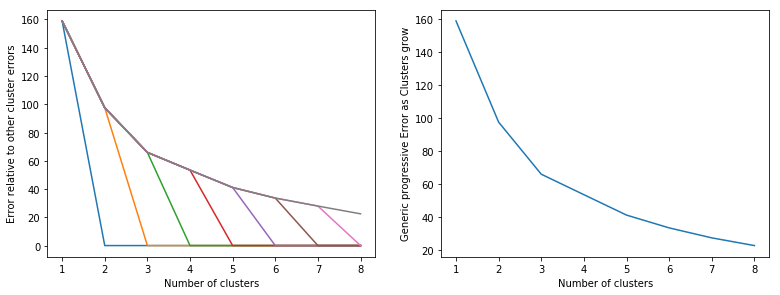

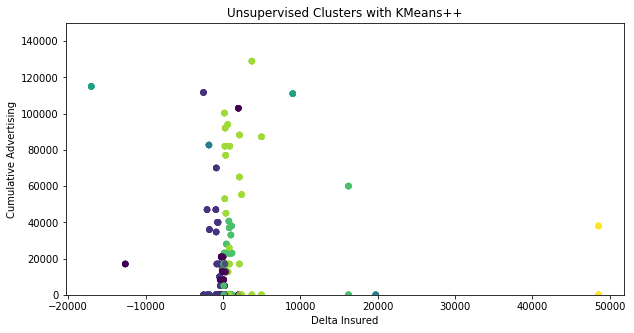

<Figure size 432x288 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

newDF = df.copy()
    
Regions = newDF['region']
newDF['region'] = newDF['region'].apply(applyRegionTag).values 

tt = newDF.copy()
for i in range(5):
    temp = tt.copy()
    newDF = newDF.append(temp, ignore_index=True)

X = newDF.loc[:]
y = newDF["region"] 
(X, y) = utils.shuffle(X, y, random_state=1)

df_norm = (newDF - newDF.mean()) / (newDF.max() - newDF.min())

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=100)
kmeans.fit_predict(df_norm)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
euclidean_dists = metrics.euclidean_distances(df_norm)

####### plot error 
plt.subplot(2,3,4)
error = np.zeros(9)
for k in range(1,9):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(df_norm)
    error[k] = kmeans.inertia_
    
    plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Error relative to other cluster errors')

#################


####### plot error to evaluate num clusters 
plt.subplot(2,3,5)
def evaluate_clusters(X, max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Generic progressive Error as Clusters grow')
    plt.show()
    
evaluate_clusters(df_norm, 8)
###########

X = newDF['adv_print'].values
y = newDF['delta_insured_population'].values
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
regionLegend = df['region'].values[:8]

plt.figure(figsize=(10,5))
plt.ylim([-10,150000])
plt.xlabel('Delta Insured')
plt.ylabel('Cumulative Advertising')
plt.title('Unsupervised Clusters with KMeans++')
plt.scatter(y, X, marker='o', c=labels, alpha=0.75, s=30)
plt.show()

plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.0)

In [12]:
df_norm

,adv_broadcast_impressions,adv_print,adv_window_reach,delta_insured_percent,delta_insured_population,income,region
0,-0.021363,0.318564,0.048229,0.446065,0.136485,0.530647,-0.407437
1,0.486179,0.064130,-0.039995,0.006749,0.111201,0.487822,-0.282437
2,0.458589,0.437359,0.926115,-0.382995,0.234888,0.840416,-0.157437
3,0.978637,0.067668,-0.039995,-0.213764,-0.285889,0.346899,-0.032437
4,0.457564,0.965948,0.960005,0.114441,0.586871,0.973261,0.092563
5,0.415519,0.513912,0.003336,0.393073,0.212563,0.484856,0.217563
6,0.299999,0.144858,-0.031274,-0.119747,-0.021147,0.248255,0.342563
7,0.129269,-0.019015,-0.039995,-0.553935,-0.218930,0.098744,0.592563
8,-0.021363,0.283760,0.650742,0.002753,0.274798,-0.026739,0.092563
9,-0.021363,0.014862,-0.003597,0.005533,0.010302,-0.026739,0.217563


## Supervised Algorithms

In this section, of series of different supervised algorithms are run to assess the predictability of income progression based on region and advertising data. 

The following algorithms are used:
<br>**Support Vector Machine
<br>K Nearest Neighbors
<br>Regularized Support Vector Machine
<br>Decision Tree Classifier
<br>Multilayer Perceptron Neural Network
<br>Logistic Regression on a Regularized Set** 

The results of the Algorithms are based on training off an amplified subset of the existing data and then tested against the remaining randomized subset of data. The accuracies reflect the correctness in predictability of the algorithms; the higher the number, the better (to a point, before *overfitting* begins)

In [80]:
newDF = df.copy()

Regions = newDF['region']
labels = newDF['region'].apply(applyRegionTag).values 
newDF['region'] = labels
    
# Amplify data space
tt = newDF.copy()
for i in range(2):
    temp = tt.copy()
    newDF = newDF.append(temp, ignore_index=True)
    
X = newDF.loc[:, newDF.columns != 'region'].values
y = newDF["region"] 

(X, y) = utils.shuffle(X, y, random_state=1)

In [81]:
(X, y) = utils.shuffle(X, y, random_state=1)
training_set = 80
training_end = 100
X_train = X[:training_set]
y_train = y[:training_set]

Xsvc_test = X[training_set:training_end]
ysvc_test = y[training_set:training_end]

svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred_test = svc.predict(Xsvc_test)
print("Accuracy of SVM test set:", svc.score(Xsvc_test, ysvc_test))

Accuracy of SVM test set: 0.4


In [83]:
(X, y) = utils.shuffle(X, y, random_state=1)

training_set = int(y.size*0.8)
X_train = X[:training_set]
y_train = y[:training_set]

X_test = X[training_set:]
y_test = y[training_set:]

k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_test2 = knn.predict(X_test)
print("Accuracy of KNN test set:", knn.score(X_test, y_test))

Accuracy of KNN test set: 0.74


In [88]:
training_set = int(y.size * 0.8)
X_train = X[:training_set]
y_train = y[:training_set]

X_test = X[training_set:]
y_test = y[training_set:]
ylabels = X_test[:,0] + X_test[:,1] + X_test[:,2]

knn_score = knn.score(X_test, y_test)
svc_score = svc.score(Xsvc_test, ysvc_test)

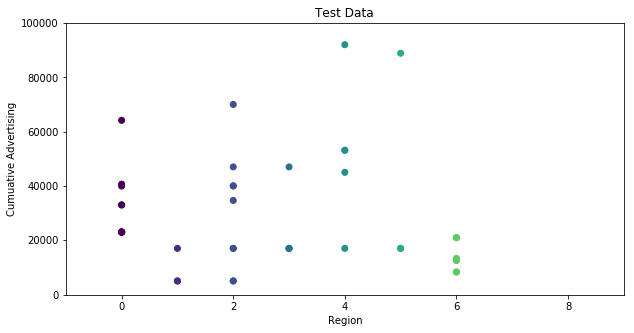

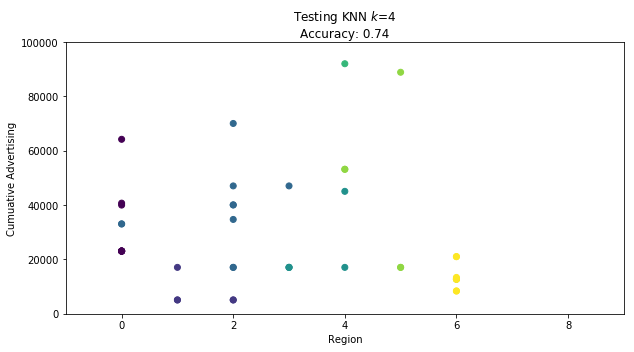

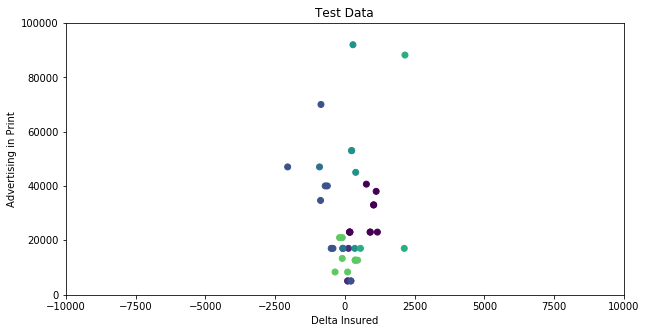

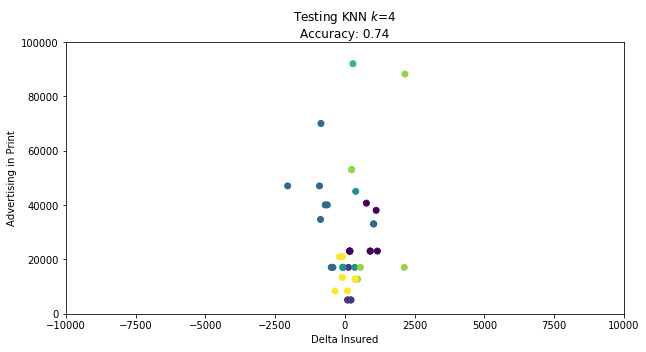

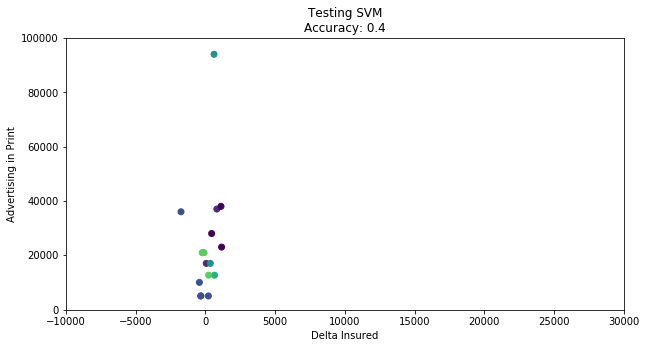

In [94]:
def printGraph(size, ylim, xlim, title, xlabel, ylabel, xaxis, yaxis, clabels):
    plt.figure(figsize=size)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(xaxis, yaxis, c=clabels)
    plt.show()
    
testData  = "Test Data"
KNNData   = "Testing KNN $k$={}\nAccuracy: {}".format(k, knn_score)
SVMData   = "Testing SVM\nAccuracy: {}".format(svc_score)
CumAdvert = "Cumuative Advertising"
Regional  = "Region"
DeltaIns  = "Delta Insured"
AdvertPr  = "Advertising in Print"

printGraph((10,5), [-100,100000], [-1,9], testData, Regional, CumAdvert, y_test, ylabels, y_test)
printGraph((10,5), [-100,100000], [-1,9], KNNData, Regional, CumAdvert, y_test, ylabels, y_pred_test2)
printGraph((10,5), [-100,100000], [-10000,10000], testData, DeltaIns, AdvertPr, X_test[:,4], X_test[:,1], y_test)
printGraph((10,5), [-100,100000], [-10000,10000], KNNData, DeltaIns, AdvertPr, X_test[:,4], X_test[:,1], y_pred_test2)
printGraph((10,5), [-100,100000], [-10000,30000], SVMData, DeltaIns, AdvertPr, Xsvc_test[:,4], Xsvc_test[:,1], ysvc_test)

The Data displayed above all correspond to a supervised measurement of **un-regularized** data, meaning the training space for the learning algorithms, such as KNearestNeighbors and Support Vector Machine, are being constructed off the assumption that the data provided can be separated linearly. This can lead to *overfitting* and *underfitting* on the training data, as the dimensional regions of the datapoints may not be able to separate the data points so neatly. 

For example, imagine a series of datapoints plotted in a circular pattern. Additionally, imagine there were realistically only two types of datapoints: pluses and minuses. From a human's eye, the datapoints are arranged such that all the pluses are located in an "inner circle" of the circular data pattern, and all of the minuses are located on an "outer circle" of the data pattern. If we were to separate these datapoints, naturally we would draw one circular cluster around all of the pluses in the middle, and then have the remaining datapoints outside this inner circle be represented as minuses in future testing. 

However, if we *linearly* attempt to separate these datapoints, there would not be a proper predictive way to do so. If you draw a line vertically down the middle, then you effectively separate all the datapoints into two halves, but both halves can have both pluses and minuses with no predictable pattern. This same issue would occur with a horizontal line down the middle. In every *linear* separation, the actual clusters of datapoints that are "likeminded" would never properly be matched with one another. Thus, any future testing would be nothing more than a geometric guessing game. 

Thus, we should also try to **regularize** the data such that we attempt to separate it *non-linearly*. One such way of regularizing the data is by using the native **kernels** for the Support Vector Machine package. In it, they provide a series of different non-linear measurements of the datapoints

With all that being said, there is no guarantee that non-linearity provides a proper separation mechanic than linearity. This is more a less of showing whether or not it works.

Accuracy of SVM test set: 0.22448979591836735
Accuracy of SVM test set: 0.02040816326530612
Accuracy of SVM test set: 0.6530612244897959
Accuracy of SVM test set: 0.16326530612244897


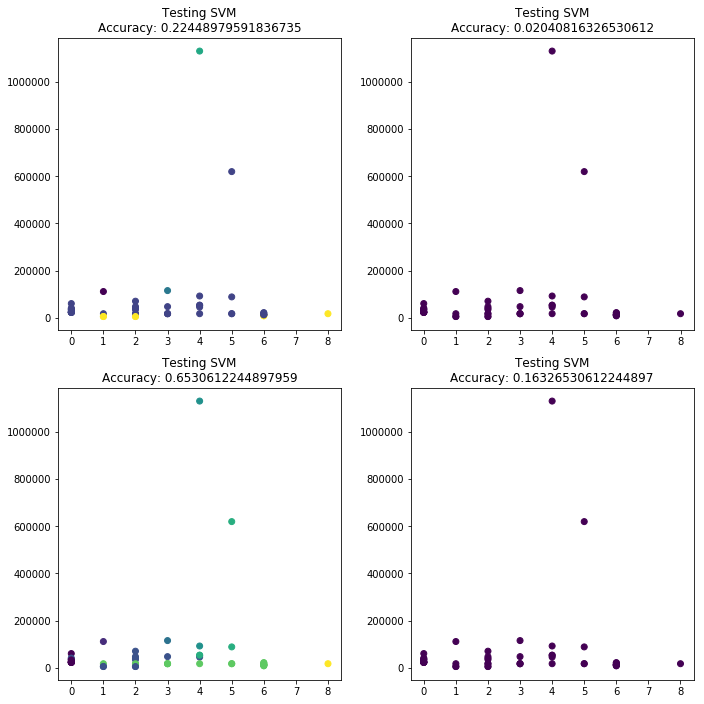

In [95]:
fig, ax = plt.subplots(figsize=(10,10))

training_set = int(y.size * 0.8)
training_end = int(y.size * 0.8) + int(y.size * 0.2)
X_train = X[:training_set]
y_train = y[:training_set]

X_test = X[training_set:training_end]
y_test = y[training_set:training_end]

svc = svm.SVC(kernel='linear', C=1e-11)
svc.fit(X_train, y_train)

y_pred_test = svc.predict(X_test)
print("Accuracy of SVM test set:", svc.score(X_test, y_test))
plt.subplot(2,2,1)
plt.scatter(y_test, X_test[:,1], c=y_pred_test)
plt.title("Testing SVM\nAccuracy: {}".format(svc.score(X_test, y_test)))
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.0)

svc = svm.SVC(kernel='poly', degree=8, gamma="auto")
svc.fit(X_train, y_train)

y_pred_test = svc.predict(X_test)
print("Accuracy of SVM test set:", svc.score(X_test, y_test))
plt.subplot(2,2,2)
plt.scatter(y_test, X_test[:,1], c=y_pred_test)
plt.title("Testing SVM\nAccuracy: {}".format(svc.score(X_test, y_test)))
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.0)

svc = svm.SVC(kernel='rbf', gamma=1e-8)
svc.fit(X_train, y_train)

y_pred_test = svc.predict(X_test)
print("Accuracy of SVM test set:", svc.score(X_test, y_test))
plt.subplot(2,2,3)
plt.scatter(y_test, X_test[:,1], c=y_pred_test)
plt.title("Testing SVM\nAccuracy: {}".format(svc.score(X_test, y_test)))

svc = svm.SVC(kernel='sigmoid', gamma=1e-7)
svc.fit(X_train, y_train)

y_pred_test = svc.predict(X_test)
print("Accuracy of SVM test set:", svc.score(X_test, y_test))
plt.subplot(2,2,4)
plt.scatter(y_test, X_test[:,1], c=y_pred_test)
plt.title("Testing SVM\nAccuracy: {}".format(svc.score(X_test, y_test)))

plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.0)

DT accuracy on test data:  1.0
DT accuracy on training data:  1.0


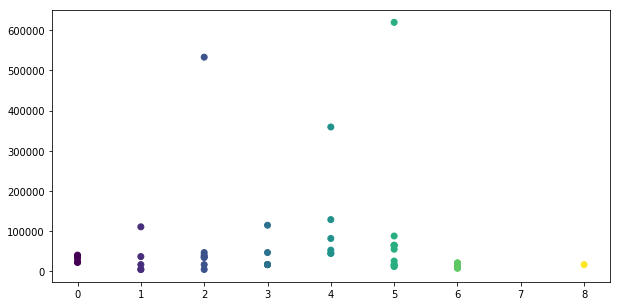

In [96]:
dtc = tree.DecisionTreeClassifier()
(X, y) = utils.shuffle(X, y, random_state=1)

fig, ax = plt.subplots(figsize=(10,5))

training_set = int(y.size * 0.8)
X_train = X[:training_set]
y_train = y[:training_set]
X_test = X[training_set:]
y_test = y[training_set:]

dtc.fit(X_train, y_train)
y_pred_test = dtc.predict(X_test)
print('DT accuracy on test data: ', dtc.score(X_test, y_test))
y_pred_train = dtc.predict(X_train)
print('DT accuracy on training data: ', dtc.score(X_train, y_train))
ax.set_xlabel="Regional Orientation"
ax.set_ylabel="Cumulative Advertising Numbers"
plt.scatter(y_test, X_test[:,1], c=y_pred_test)
plt.show()

Accuracy of Neural Network test set: 0.14


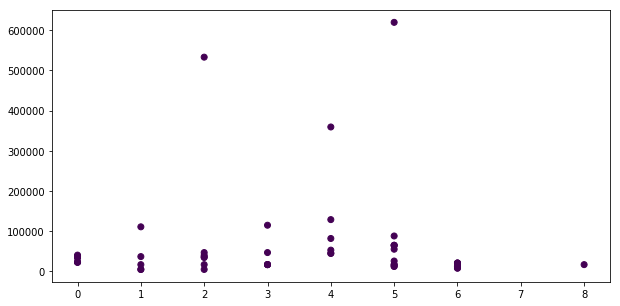

In [97]:
fig, ax = plt.subplots(figsize=(10,5))

X_train = X[:training_set]
y_train = y[:training_set]
X_test = X[training_set:]
y_test = y[training_set:]

mlp = MLPClassifier(solver='lbfgs', alpha=1e5, hidden_layer_sizes=(10, 2), random_state=1)
mlp.fit(X_train, y_train)
y_pred_test = mlp.predict(X_test)
print("Accuracy of Neural Network test set:", mlp.score(X_test, y_test))
plt.scatter(y_test, X_test[:,1], c=y_pred_test)
plt.set_ylabel="Advertising on print"

Accuracy of Logistic Regresion test set: 0.54


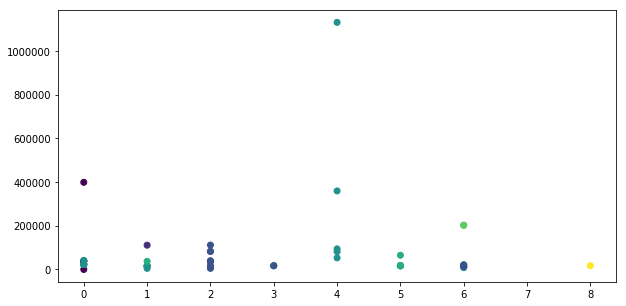

In [98]:
fig, ax = plt.subplots(figsize=(10,5))

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
(X, y) = utils.shuffle(X, y, random_state=1)

training_end = int(y.size*0.8) 
X_train = X[:training_end]
y_train = y[:training_end]
X_test = X[training_end:]
y_test = y[training_end:]

clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
print("Accuracy of Logistic Regresion test set:", clf.score(X_test, y_test))
plt.scatter(y_test, X_test[:,1], c=y_pred_test)

## <div style="text-align: center"><span style="font-size:25px; text-decoration:underline;">Conclusion</span></div>
In both the Supervised algorithms and in the Unsupervised algorithm, there seemed to be a correlation with the regional affects of insurance changes. Specifically, some regions that saw an increase in advertising numbers increased the amount of people who got insured, and in some regions the increase in advertising had a negative effect. Simply put, regional data seems to player a higher role than advertising, likely as a result of other external metrics within these regions also at play